In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Sales =pd.read_csv('sales_data.csv')

In [25]:
Sales.head(100)

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
95,2022-04-04,Coat,Clothing,100.0,15.0,1500.0
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN
97,2022-04-06,Smartphone,Electronics,600.0,7.0,4200.0
98,2022-04-07,Backpack,Bags,50.0,18.0,900.0


In [4]:
Sales.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [8]:
SLS_CN = Sales.dropna()

In [10]:
SLS_CN.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [12]:
SLS_CN.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [14]:
SLS_CN.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [15]:
SLS_CN['date'] = pd.to_datetime(SLS_CN['date'])

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_11356\2075161220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SLS_CN['date'] = pd.to_datetime(SLS_CN['date'])


In [16]:
SLS_CN.dtypes

date        datetime64[ns]
product             object
category            object
price              float64
quantity           float64
revenue            float64
dtype: object

In [17]:
SLS_CN.duplicated().sum()

1

In [18]:
SLS_CN_1 = SLS_CN.drop_duplicates()

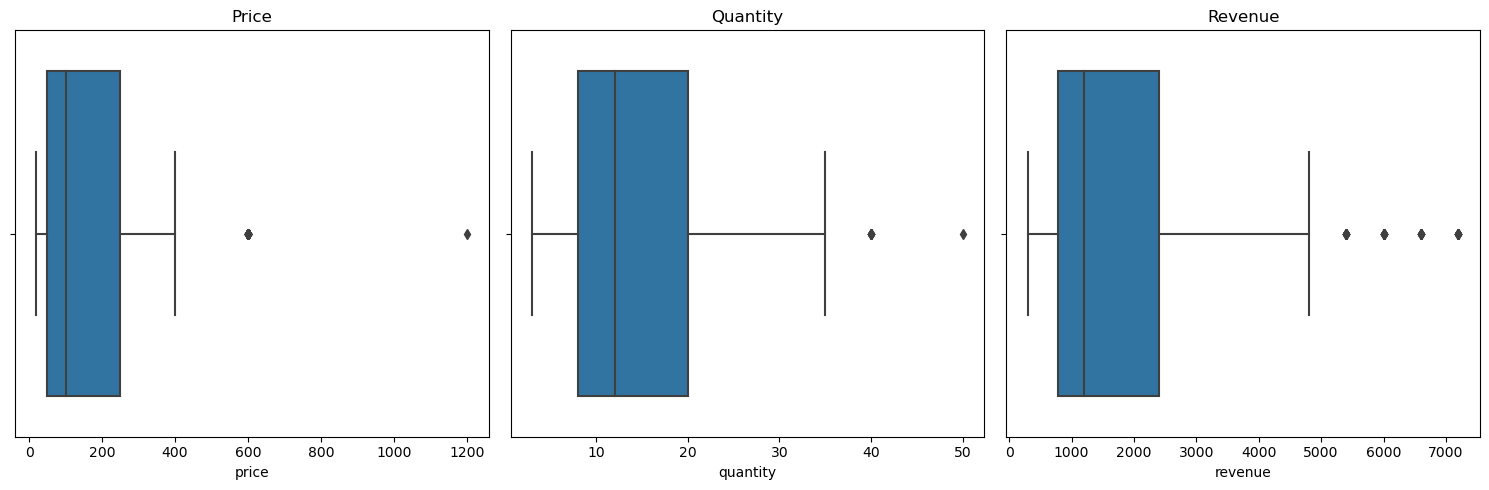

In [19]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create box plots for price, quantity, and revenue columns
sns.boxplot(x='price', data=SLS_CN_1, ax=axes[0])
axes[0].set_title('Price')

sns.boxplot(x='quantity', data=SLS_CN_1, ax=axes[1])
axes[1].set_title('Quantity')

sns.boxplot(x='revenue', data=SLS_CN_1, ax=axes[2])
axes[2].set_title('Revenue')

# Display the plots
plt.tight_layout()
plt.show()

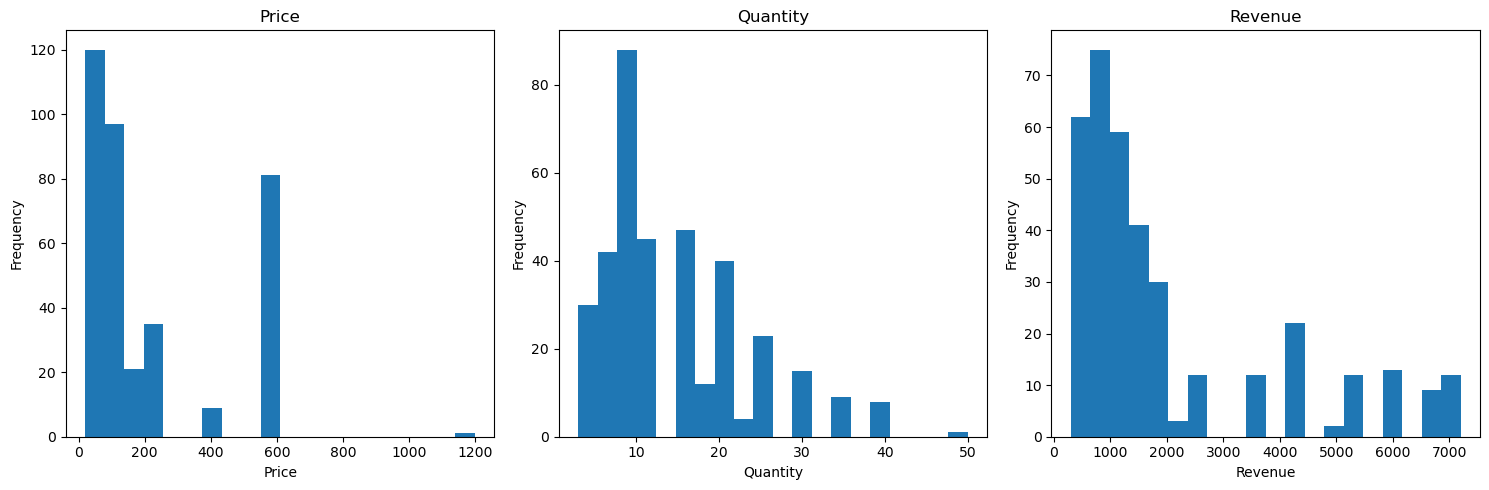

In [23]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create histograms for price, quantity, and revenue columns
SLS_CN_1['price'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Price')
axes[0].set_xlabel('Price')

SLS_CN_1['quantity'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].set_title('Quantity')
axes[1].set_xlabel('Quantity')

SLS_CN_1['revenue'].plot(kind='hist', bins=20, ax=axes[2])
axes[2].set_title('Revenue')
axes[2].set_xlabel('Revenue')

# Display the plots
plt.tight_layout()
plt.show()

In [24]:
SLS_CN_1['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes',
       'Clohting', 'Bgas', 'Shoeses'], dtype=object)

In [26]:
category_mapping = {
    'Clohting': 'Clothing',
    'Bgas': 'Bags',
    'Shoeses': 'Shoes'
}
SLS_CN_1['category'] = SLS_CN_1['category'].replace(category_mapping)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_11356\3352964784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SLS_CN_1['category'] = SLS_CN_1['category'].replace(category_mapping)


In [27]:
SLS_CN_1['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes'],
      dtype=object)

In [28]:
SLS_CN_1.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [31]:
total_revenue = SLS_CN_1['revenue'].sum()
total_revenue

747230.0

Total Revenue = 747230.0

In [33]:
# Group by product
product_revenue = SLS_CN_1.groupby('product')['revenue'].sum()
product_revenue

product
Backpack       20400.0
Coat           33800.0
Headphones     18000.0
Hoodie         19800.0
Jeans          20650.0
Laptop          6000.0
Smartphone    427800.0
Smartwatch     58800.0
Sneakers       21600.0
Speaker        39680.0
T-Shirt        20100.0
Tablet         18000.0
Wallet         12150.0
Watch          30450.0
Name: revenue, dtype: float64

In [36]:
highest_revenue_product = product_revenue.idxmax()
highest_revenue_product

'Smartphone'

In [37]:
highest_revenue = product_revenue.max()
highest_revenue

427800.0

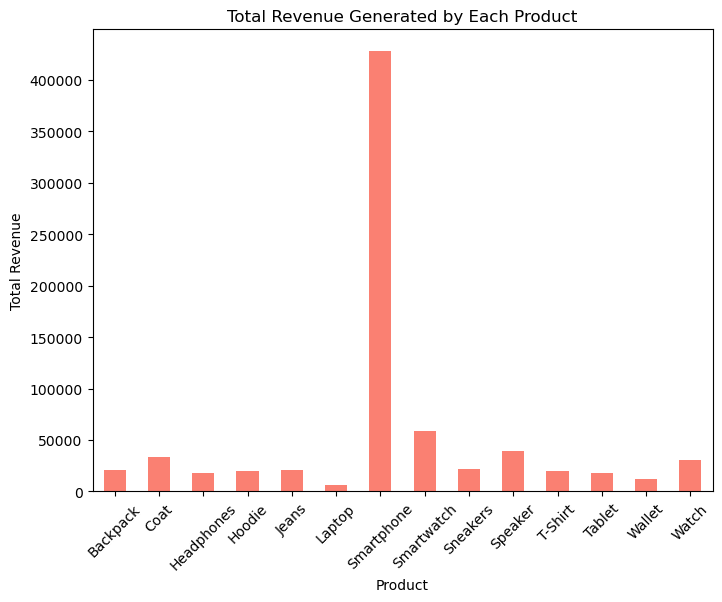

In [68]:
plt.figure(figsize=(8, 6))
product_revenue.plot(kind='bar', color='salmon')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated by Each Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Smartphone is the highest revenue product that produces 427800.0

In [39]:
average_price = SLS_CN_1['price'].mean()
average_price

210.65934065934067

Average price of a product sold by the company: 210.65934065934067

In [40]:
total_quantity = SLS_CN_1['quantity'].sum()
total_quantity

5270.0

Total quantity of products sold by the company: 5270.0

In [43]:
category_revenue = SLS_CN_1.groupby('category')['revenue'].sum()
category_revenue

category
Accessories    101400.0
Bags            20400.0
Clothing        94350.0
Electronics    509480.0
Shoes           21600.0
Name: revenue, dtype: float64

In [45]:
highest_revenue_category = category_revenue.idxmax()
highest_revenue_category

'Electronics'

In [46]:
highest_revenue = category_revenue.max()
highest_revenue

509480.0

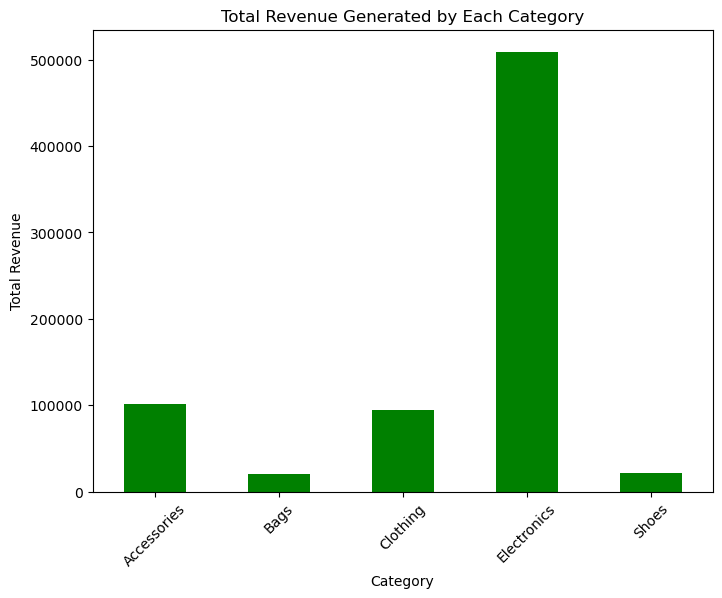

In [63]:
plt.figure(figsize=(8, 6))
category_revenue.plot(kind='bar', color='green')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated by Each Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Category with the highest revenue: Electronics

Revenue generated by the highest revenue category: 509480.0

In [49]:
total_revenue = SLS_CN_1['revenue'].sum()
total_revenue

747230.0

In [50]:
total_sales = len(SLS_CN_1)
total_sales

364

In [51]:
average_revenue_per_sale = total_revenue / total_sales
average_revenue_per_sale

2052.8296703296705

Average revenue per sale: 2052.8296703296705

In [52]:
SLS_CN_1['date'] = pd.to_datetime(SLS_CN_1['date'])
SLS_CN_1['date']

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_11356\10329031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SLS_CN_1['date'] = pd.to_datetime(SLS_CN_1['date'])


0     2022-01-01
1     2022-01-01
2     2022-01-02
3     2022-01-03
4     2022-01-04
         ...    
364   2022-12-27
365   2022-12-28
366   2022-12-29
367   2022-12-30
368   2022-12-31
Name: date, Length: 364, dtype: datetime64[ns]

In [53]:
SLS_CN_1['quarter'] = SLS_CN_1['date'].dt.quarter
SLS_CN_1['quarter'] 

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_11356\1538928912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SLS_CN_1['quarter'] = SLS_CN_1['date'].dt.quarter


0      1
1      1
2      1
3      1
4      1
      ..
364    4
365    4
366    4
367    4
368    4
Name: quarter, Length: 364, dtype: int64

In [54]:
quarterly_revenue = SLS_CN_1.groupby('quarter')['revenue'].sum()
quarterly_revenue

quarter
1    182100.0
2    177370.0
3    195430.0
4    192330.0
Name: revenue, dtype: float64

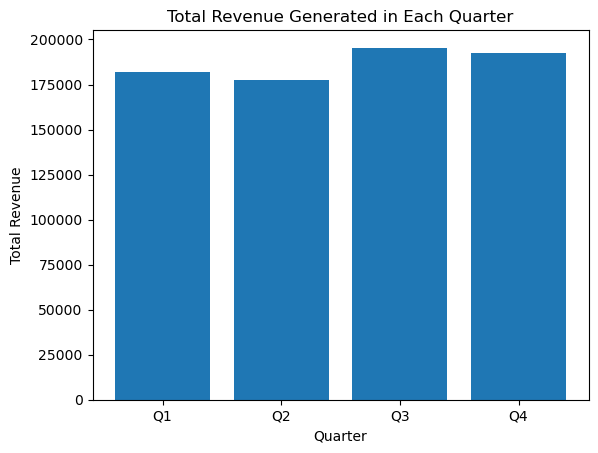

In [58]:
plt.bar(quarterly_revenue.index, quarterly_revenue.values)
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated in Each Quarter')
plt.xticks(quarterly_revenue.index, labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

Quarter
1st: 182100.0;
2nd: 177370.0;
3rd: 195430.0;
4th: 192330.0